## Outlier Investigation

After tuning the model thoroughly, the hypothesis to improve accuracy consists on removing "bad samples"/outliers from the training set. The test set must not change otherwise the values will contain a bias not reflected in the real population. There are two approaches to this:

1. Remove/flip the actual samples from the dataset;
2. **Make the model training remove the outliers automatically;**

---

Findings:

- 500 samples of "outliers" (i.e., introverts that look like extroverts, and vice-versa);
- Solutions:
  - Remove outliers;
  - **Flip their class**; 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_parquet("../data/processed/v1/train.parquet")

In [2]:
X_pca = PCA(n_components=2).fit_transform(df.drop(columns=["id", "personality"])).T
df["X_0"] = (X_pca[0] + 1) / 2
df["X_1"] = (X_pca[1] + 1) / 2
del X_pca

<Axes: xlabel='X_0', ylabel='X_1'>

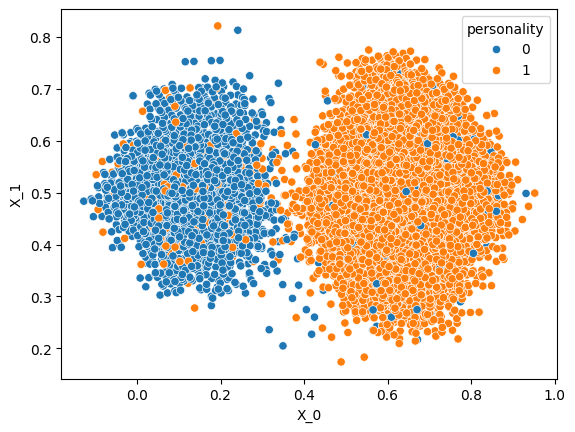

In [3]:
sns.scatterplot(df, x="X_0", y="X_1", hue="personality")

In [4]:
# Extroverts that look like introverts
df[(df.X_0 > 0.375) & (df.personality == 0)]

,id,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency,personality,X_0,X_1
11036,11036,0.090909,0.363636,0.571429,0.933333,0.498312,0,0.610377,0.650282
10331,10331,0.181818,0.727273,1.000000,0.531267,0.600000,0,0.697523,0.433774
4226,4226,0.285877,0.636364,0.857143,0.600000,0.500000,0,0.613992,0.501108
6667,6667,0.000000,0.545455,1.000000,0.333333,0.700000,0,0.682585,0.321330
2315,2315,0.181818,0.545455,0.857143,1.000000,0.500000,0,0.708849,0.650625
...,...,...,...,...,...,...,...,...,...
15654,15654,0.000000,0.636364,1.000000,0.200000,0.700000,0,0.670758,0.274505
1873,1873,0.090909,0.818182,1.000000,1.000000,1.000000,0,0.931794,0.498393
8501,8501,0.090909,0.545455,0.575292,0.666667,0.900000,0,0.679659,0.436340
12399,12399,0.000000,0.272727,0.857143,0.200000,0.700000,0,0.565387,0.274073


In [5]:
# Introverts that look like extroverts
df[(df.X_0 < 0.375) & (df.personality == 1)]

,id,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency,personality,X_0,X_1
7606,7606,0.909091,0.636364,0.714286,0.400000,0.400000,1,0.369677,0.466065
651,651,1.000000,0.181818,0.428571,0.266667,0.300000,1,0.138929,0.455828
5157,5157,0.545455,0.090909,0.285714,0.200000,0.200000,1,0.153272,0.475493
11758,11758,0.545455,0.000000,0.575292,0.066667,0.000000,1,0.129578,0.447379
10080,10080,0.454545,0.181818,0.575292,0.531267,0.000000,1,0.289081,0.633909
...,...,...,...,...,...,...,...,...,...
14256,14256,0.909091,0.000000,0.285714,0.200000,0.200000,1,0.052219,0.468694
139,139,1.000000,0.181818,0.285714,0.133333,0.200000,1,0.052144,0.450825
11546,11546,0.727273,0.000000,0.000000,0.066667,0.498312,1,0.064029,0.362299
11768,11768,0.636364,0.479263,0.428571,0.400000,0.200000,1,0.287053,0.552832
